# Cleaning Data in Python

It's commonly said that data scientists spend 80% of their time cleaning and manipulating data and only 20% of their time analyzing it. The time spent cleaning is vital since analyzing dirty data can lead you to draw inaccurate conclusions.

Data cleaning is an essential task in data science. Without properly cleaned data, the results of any data analysis or machine learning model could be inaccurate. In this course, you will learn how to identify, diagnose, and treat a variety of data cleaning problems in Python, ranging from simple to advanced. You will deal with improper data types, check that your data is in the correct range, handle missing data, perform record linkage, and more!

## Common data problems

In this chapter, you'll learn how to overcome some of the most common dirty data problems. You'll convert data types, apply range constraints to remove future data points, and remove duplicated data points to avoid double-counting.

### Data type constraints

Course outline:

* diagnose dirty data
* side effects of dirty data
* cleaning data

#### Why do we need to clean data?

DS workflow:

access data --> explore and process data --> extract insights --> report insights

Dirty data is caused by both human and technical errors and will taint every step of the DS workflow the data is used in.

GIGO

### Numeric data or ... ?

In this exercise, and throughout this chapter, you'll be working with bicycle ride sharing data in San Francisco called `ride_sharing`. It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service.

The `user_type` column contains information on whether a user is taking a free ride and takes on the following values:

`1` for free riders.
`2` for pay per ride.
`3` for monthly subscribers.

In this instance, you will print the information of `ride_sharing` using `.info()` and see a firsthand example of how an incorrect data type can flaw your analysis of the dataset. The pandas package is imported as `pd`.

In [1]:
"""set up"""
import pandas as pd
from pathlib import Path

ride_sharing_csv = Path.cwd() / "data/ride_sharing_new.csv"

ride_sharing = pd.read_csv(ride_sharing_csv)

##### Instructions 1/3

* Print the information of `ride_sharing`.
* Use `.describe()` to print the summary statistics of the `user_type` column from `ride_sharing`.

In [2]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing["user_type"].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


##### Instructions 2/3

By looking at the summary statistics - they don't really seem to offer much description on how users are distributed along their purchase type, why do you think that is?

**Possible answers**

1. The `user_type` column is not of the correct type, it should be converted to `str`.
2. The `user_type` column has an infinite set of possible values, it should be converted to `category`.
3. The `user_type` column has an finite set of possible values that represent groupings of data, it should be converted to `category`.

**Answer: 3**

##### Instructions 3/3

* Convert `user_type` into categorical by assigning it the `'category'` data type and store it in the `user_type_cat` column.
* Make sure you converted `user_type_cat` correctly by using an `assert` statement.

In [3]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing["user_type"].describe())

# Convert user_type from integer to category
ride_sharing["user_type_cat"] = ride_sharing["user_type"].astype("category")

# Write an assert statement confirming the change
assert ride_sharing["user_type_cat"].dtype == "category"

# Print new summary statistics
print(ride_sharing["user_type_cat"].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64
count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dty

### Summing strings and concatenating numbers

In the previous exercise, you were able to identify that `category` is the correct data type for `user_type` and convert it in order to extract relevant statistical summaries that shed light on the distribution of `user_type`.

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In this exercise, you'll be converting the string column `duration` to the type `int`. Before that however, you will need to make sure to strip `"minutes"` from the column in order to make sure pandas reads it as numerical. The pandas package has been imported as `pd`.

In [4]:
# Strip duration of minutes
ride_sharing["duration_trim"] = ride_sharing["duration"].str.strip("minutes")

# Convert duration to integer
ride_sharing["duration_time"] = ride_sharing["duration_trim"].astype("int")

# Write an assert statement making sure of conversion
assert ride_sharing["duration_time"].dtype == "int"

# Print formed columns and calculate average ride duration
print(ride_sharing[["duration", "duration_trim", "duration_time"]])
print(ride_sharing["duration_time"].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


### Data range constraints

Examples of constraints being violated include a movie having a rating of 6 on a scale of 1-5 or subscription dates that are in the future.

```python
import datetime as dt
user_signups[user_signups['subscription_date] > dt.date.today()]
```

#### How to deal with out of range data?

* drop it (caution!)
* setting custom minimums and maximums
* treat as missing and impute
* setting custom value depending on business assumptions

#### Movies example

```python
import pandas as pd
# output movies with rating > 5
movies[movies['avg_rating'] > 5]

# drop values using filtering
movies = movies[movies['avg_rating'] <= 5]
# drop values using .drop()
movies.drop(movies[movies['avg_rating'] > 5].index, inplace = True)
# assert results
assert movies['avg_rating'].max() <= 5
```

```python
# convert avg_rating > 5 to 5
movies.loc[movies['avg_rating'] > 5, 'avg_rating'] = 5
# assert results
assert movies['avg_rating'].max() <= 5
```

#### Date range example

```python
import datetime as dt
import pandas as pd

# output data types
user_signups.dtypes  # subscription_date is 'object'
# convert to date
user_signups['subscription_date'] = pd.to_datetime(user_signups['subscription_date']).dt.date

today_date = dt.date.today()

## drop the data
# drop values using filtering
user_signups = user_signups[user_signups['subscription_date'] < today_date]
# drop values using .drop()
user_signups.drop(user_signups[user_signups['subsctiption_date'] > today_date].index, inplace = True)

## Hardcode dates with upper limit
user_signups.loc[user_signups['subscription_date'] > today_date, 'subscription_date'] = today_date
assert user_signups.subscription_date.max().date() <= today_date
```

In [5]:
import numpy as np

# The ride_sharing DataFrame provided does not have the tire_sizes column so we
# must first create it.

sizes = [26, 27, 29]
ride_sharing["tire_sizes"] = np.random.choice(sizes, len(ride_sharing))
ride_sharing["tire_sizes"] = ride_sharing["tire_sizes"].astype("category")

# Convert tire_sizes to integer
ride_sharing["tire_sizes"] = ride_sharing["tire_sizes"].astype("int")

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing.tire_sizes > 27, "tire_sizes"] = 27

# Reconvert tire_sizes back to categorical
ride_sharing["tire_sizes"] = ride_sharing["tire_sizes"].astype("category")

# Print tire size description
print(ride_sharing["tire_sizes"].describe())

count     25760
unique        2
top          27
freq      17099
Name: tire_sizes, dtype: int64


### Tire size constraints

In this lesson, you're going to build on top of the work you've been doing with the `ride_sharing` DataFrame. You'll be working with the `tire_sizes` column which contains data on each bike's tire size.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In this exercise, you will make sure the `tire_sizes` column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

##### Instructions

* Convert the `tire_sizes` column from `category` to '`int`'.
* Use `.loc[]` to set all values of `tire_sizes` above 27 to 27.
* Reconvert back `tire_sizes` to `'category'` from `int`.
* Print the description of the `tire_sizes`.

In [6]:
# Convert tire_sizes to integer
ride_sharing["tire_sizes"] = ride_sharing["tire_sizes"].astype("int")

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing.tire_sizes > 27, "tire_sizes"] = 27

# Reconvert tire_sizes back to categorical
ride_sharing["tire_sizes"] = ride_sharing["tire_sizes"].astype("category")

# Print tire size description
print(ride_sharing["tire_sizes"].describe())

count     25760
unique        2
top          27
freq      17099
Name: tire_sizes, dtype: int64


### Back to the future

A new update to the data pipeline feeding into the `ride_sharing` DataFrame has been updated to register each ride's date. This information is stored in the `ride_date` column of the type `object`, which represents strings in `pandas`.

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the `ride_date` column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert `ride_date` to a `datetime` object.

The `datetime` package has been imported as `dt`, alongside all the packages you've been using till now.

##### Instructions


* Convert `ride_date` to a `datetime` object using `to_datetime()`, then convert the `datetime` object into a `date` and store it in `ride_dt` column.
* Create the variable `today`, which stores today's date by using the `dt.date.today()` function.
* For all instances of `ride_dt` in the future, set them to today's date.
* Print the maximum date in the `ride_dt` column.


In [7]:
import datetime as dt

# The ride_sharing DataFrame provided does not have the ride_date column so we
# must first create it.


def random_dates(start: pd.Timestamp, end: pd.Timestamp, n=1):
    """Retrun n random dates between start and end.."""
    # start_date = start.value // (10**9)
    # end_date = end.value // (10**9)
    start_date = start.value // (24 * 60 * 60 * 10**9)
    end_date = end.value // (24 * 60 * 60 * 10**9)
    return pd.to_datetime(np.random.randint(start_date, end_date, n), unit="D")


start_date = pd.to_datetime("2017-01-01")
end_date = pd.to_datetime("2025-12-31")
dates = random_dates(start_date, end_date, len(ride_sharing))
ride_sharing["ride_date"] = dates

# Convert ride_date to date
ride_sharing["ride_dt"] = pd.to_datetime(ride_sharing["ride_date"]).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing["ride_dt"] > today, "ride_dt"] = today

# Print maximum of ride_dt column
print(ride_sharing["ride_dt"].max())

2024-01-17


### Uniqueness constraints

#### How to find duplicate values?

Use the `.duplicated()` method. Returns a Series of bools.

``` python
duplicates = height_weight.duplicated()
print(duplicates)
```

``` text
1       False
...     ...
22      True
23      False
...     ...
```

See which rows are duplicated. 

Problem is that all duplicated values are marked *except* the first one which makes it hard to know exactly what type of duplication we have (the results below show the second and subsequent occurrence of whatever duplicate value was found).

``` python
duplicates = height_weight.duplicated()
height_weight[duplicates]
```

``` text
    first_name last_name                            address height weight
100       Mary     Colon                        4674 Ut Rd.    179     75
101       Ivor    Pierce                  102-3364 Non Road    168     88
102       Cole    Palmer                    8366 At, Street    178     91
103    Desirae   Shannon PO Box 643, 5251 Consectetuer, Rd.    196     83
```

To fix this, use these two arguments to `duplicated()`:

* `subset`: List of column names to check for duplication
* `keep`: Whether to keep **first** (`first`), **last** (`last`), or **all** (`False`) duplicate values.

Here we are checking for duplicates across the first name, last name, and address variables and we're choosing to keep all the duplicates.

``` python
column_names = ['first_name', 'last_name', 'address']
duplicates = height_weight.duplicated(subset = column_names, keep = False)
```

``` text
    first_name last_name                            address height weight
1         Ivor    Pierce                  102-3364 Non Road    168     66
22        Cole    Palmer                    8366 At, Street    178     91
28     Desirae   Shannon PO Box 643, 5251 Consectetuer, Rd.    195     83
37        Mary     Colon                        4674 Ut Rd.    179     75
100       Mary     Colon                        4674 Ut Rd.    179     75
101       Ivor    Pierce                  102-3364 Non Road    168     88
102       Cole    Palmer                    8366 At, Street    178     91
103    Desirae   Shannon PO Box 643, 5251 Consectetuer, Rd.    196     83
```

``` python
height_weight[duplicates].sort_values(by = 'first_name')
```

``` text
    first_name last_name                            address height weight
22        Cole    Palmer                    8366 At, Street    178     91
102       Cole    Palmer                    8366 At, Street    178     91
28     Desirae   Shannon PO Box 643, 5251 Consectetuer, Rd.    195     83
103    Desirae   Shannon PO Box 643, 5251 Consectetuer, Rd.    196     83
1         Ivor    Pierce                  102-3364 Non Road    168     66
101       Ivor    Pierce                  102-3364 Non Road    168     88
37        Mary     Colon                        4674 Ut Rd.    179     75
100       Mary     Colon                        4674 Ut Rd.    179     75
```

We find that there are four sets of duplicated rows, the first 2 (Cole Palmer) and last 2 (Mary Colon) being complete duplicates of each other across all columns.

The other 2 (Desirae Shannon and Ivor Pierce) being incomplete duplicates of each other with discrepancies across height and weight respectively. 

#### How to treat duplicate values?

Complete duplicates are easy. Use the `.drop_duplicates()` method to which also takes in the same `subset` and `keep` arguments as in the `duplicated()` method, as well as the `inplace` argument which drops the duplicated values directly inside the height_weight DataFrame. 

* `subset`: List of column names to check for duplication
* `keep`: Whether to keep **first** (`first`), **last** (`last`), or **all** (`False`) duplicate values.
* `inplace`: Drop duplicated rows directly inside DataFrame without crating new object.

``` python
# drop complete duplicates only
height_weight.drop_duplicates(inplace = True)
```

Since the `keep` argument takes in `first` as default, we can keep it as such. Note that we can also set it as `last`, but not as `False` as it would keep all duplicates. 

This leaves the other 2 sets of duplicates which have the same `first_name`, `last_name`, and `address` but contain discrepancies in `height` and `weight`. Apart from dropping rows with really small discrepancies, we can use a statistical measure to combine each set of duplicated values. 

For example, we can combine these two rows into one by computing the average mean between them, or the maximum, or other statistical measures, this is highly dependent on a common sense understanding of our data, and what type of data we have. 

``` python
column_names = ['first_name', 'last_name', 'address']
duplicates = height_weight.duplicated(subset = column_names, keep = False)
height_weight[duplicates].sort_values(by = 'first_name')
```

``` text
    first_name last_name                            address height weight
28     Desirae   Shannon PO Box 643, 5251 Consectetuer, Rd.    195     83
103    Desirae   Shannon PO Box 643, 5251 Consectetuer, Rd.    196     83
1         Ivor    Pierce                  102-3364 Non Road    168     66
101       Ivor    Pierce                  102-3364 Non Road    168     88
```

Do this using the `.groupby()` and `.agg()` methods which let you group by a set of common columns and return statistical values for specific columns when the aggregation is being performed. 

For example here, we created a dictionary called summaries, which instructs `groupby` to return the maximum of duplicated rows for the height column, and the mean duplicated rows for the weight column. We then group `height_weight` by the column names defined earlier, and chained it with the `agg` method, which takes in the summaries dictionary we created. We chain this entire line with the `.reset_index()` method, so that we can have numbered indices in the final output. We can verify that there are no more duplicate values by running the duplicated method again, and use brackets to output duplicate rows. 

``` python
# group by column names and produce statistical summaries
column_names = ['first_name', 'last_name', 'address']
summaries = {'height': 'max', 'weight': 'mean'}
height_weight = height_weight.groupby(by = column_names).agg(summaries).reset_index()
# verify no more duplicates
duplicates = height_weight.duplicated(subset = colum_names, keep = False)
height_weight[duplicates].sort_values(by = 'first_name')
```

### Finding duplicates

A new update to the data pipeline feeding into `ride_sharing` has added the `ride_id` column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the `ride_sharing` DataFrame.

In this exercise, you will confirm this suspicion by finding those duplicates. A sample of `ride_sharing` is in your environment, as well as all the packages you've been working with thus far.

##### Instructions

* Find duplicated rows of `ride_id` in the `ride_sharing` DataFrame while setting keep to False.
* Subset `ride_sharing` on `duplicates` and sort by `ride_id` and assign the results to `duplicated_rides`.
* Print the `ride_id`, `duration` and `user_birth_year` columns of `duplicated_rides` in that order.

In [8]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset="ride_id", keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values(by="ride_id")

# Print relevant columns
print(duplicated_rides[["ride_id", "duration", "user_birth_year"]])

KeyError: Index(['ride_id'], dtype='object')

### Treating duplicates

In the last exercise, you were able to verify that the new update feeding into `ride_sharing` contains a bug generating both complete and incomplete duplicated rows for some values of the `ride_id` column, with occasional discrepant values for the `user_birth_year` and `duration` columns.

In this exercise, you will be treating those duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average `duration`, and the minimum `user_birth_year` for each set of incomplete duplicate rows.

##### Instructions

* Drop complete duplicates in `ride_sharing` and store the results in `ride_dup`.
* Create the statistics dictionary which holds **min**imum aggregation for `user_birth_year` and **mean** aggregation for `duration`.
* Drop incomplete duplicates by grouping by `ride_id` and applying the aggregation in `statistics`.
* Find duplicates again and run the `assert` statement to verify de-duplication.


In [ ]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {"user_birth_year": "min", "duration": "mean"}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby("ride_id").agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset="ride_id", keep=False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

## Text and categorical data problems

Categorical and text data can often be some of the messiest parts of a dataset due to their unstructured nature. In this chapter, you’ll learn how to fix whitespace and capitalization inconsistencies in category labels, collapse multiple categories into one, and reformat strings for consistency.

### Membership constraints

Categorical variables represent predefined, finite sets of categories.

| Type if data | Example values | Numeric (categorical) representation |
|--------------|----------------|--------------------------------------|
| Marriage Status | `unmarried`, `married` | `0`, `1` |
| Household Income Category | `0-20K`, `20-40K`, ... | `0`, `1`, --- |
| Loan Status | `default`, `payed`, `no_loan` | `0`, `1`, `2` |

Machine learning models often require categorical data to be encoded as numbers.

Since categorical data represent a predefined set of categories they can't have values that fall outside of the predefined categories.

There are many reasons why there may be errors in our categorical data:

* data entry errors
* parsing errors

There are a variety of ways these errors can be treated:

* dropping data
* remapping categories
* inferring categories
* ...

Here's a DataFrame named `study_data` containing a list of first names, birth dates, and blood types. Additionally, a DataFrame named `categories`, containing the correct possible categories for the blood type column has been created as well. 

``` python
# read study data and print it
study_data = pd.read_csv('study.csv')
study_data
```

``` text
      name   birthday blood_type
1     Beth 2019-10-20         B-
2 Ignatius 2020-07-08         A-
3     Paul 2019-08-12         O+
4    Helen 2019-03-17         O-
5 Jennifer 2019-12-17         Z+   <---
6  Kennedy 2020-04-27         A+
7    Keith 2019-04-19        AB+
```

``` python
# correct possible blood types
categories
```

``` text
  blood_type
1         O-
2         O+
3         A-
4         A+
5         B+
6         B-
7        AB+
8        AB-
```

Notice the Z+ blood type. The `categories` DataFrame will help systematically spot rows with these inconsistencies. 

It's good practice to keep a log of all possible values of your categorical data.

#### A note on joins

The two main types of joins we care about here are **anti joins** and **inner joins**.

Anti joins take in two DataFrames A and B, and return data from one DataFrame that is not contained in another. In this example, we are performing a left anti join of A and B, and are returning the columns of DataFrames A and B for values only found in A of the common column between them being joined on.

Inner joins, return only the data that is contained in both DataFrames. For example, an inner join of A and B, would return columns from both DataFrames for values only found in A and B, of the common column between them being joined on. 

![anti joins and inner joins](images/joins_small.png)

#### Left anti join on blood types

In our example, an left anti join essentially returns all the data in study data with inconsistent blood types,

![anti join](images/anti_join.png)

and an inner join returns all the rows containing consistent blood types signs. 

![inner join](images/inner_join.png)

#### Finding inconsistent categories

``` python
inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type'])
print(inconsistent_categories)
```

``` text
{'Z+}
```

``` python
# get inconsistent rows
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)
study_data[inconsistent_rows]
```

``` text
      name   birthday blood_type
5 Jennifer 2019-12-17         Z+
```

#### Dropping inconsistent categories

Use the tilde symbol (`~`) while subsetting which returns everything except inconsistent rows

``` python
inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type'])
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)
inconsistent_data = study_data[inconsistent_rows]
# drop inconsistent categories and get consistent data only
consistent_data = study_data[~inconsistent_rows]
```

``` text
      name   birthday blood_type
1     Beth 2019-10-20         B-
2 Ignatius 2020-07-08         A-
3     Paul 2019-08-12         O+
4    Helen 2019-03-17         O-
6  Kennedy 2020-04-27         A+
7    Keith 2019-04-19        AB+
```

### Finding consistency

In this exercise and throughout this chapter, you'll be working with the `airlines` DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named `categories` was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The pandas package has been imported as pd, and the `airlines` and `categories` DataFrames are in your environment.

##### Instructions 1/4

* Print the `categories` DataFrame and take a close look at all possible correct categories of the survey columns.
* Print the unique values of the survey columns in `airlines` using the `.unique()` method.


In [ ]:
# setup
import pandas as pd
from pathlib import Path

airlines_csv = Path.cwd() / "data/airlines.csv"
categories_csv = Path.cwd() / "data/airlines_categories.csv"

airlines = pd.read_csv(airlines_csv)
categories = pd.read_csv(categories_csv)

In [ ]:
# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print("Cleanliness: ", airlines["cleanliness"].unique(), "\n")
print("Safety: ", airlines["safety"].unique(), "\n")
print("Satisfaction: ", airlines["satisfaction"].unique(), "\n")

   Unnamed: 0     cleanliness           safety          satisfaction
0           0           Clean          Neutral        Very satisfied
1           1         Average        Very safe               Neutral
2           2  Somewhat clean    Somewhat safe    Somewhat satisfied
3           3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           4           Dirty  Somewhat unsafe      Very unsatisfied
Cleanliness:  ['Clean' 'Average' 'Unacceptable' 'Somewhat clean' 'Somewhat dirty'
 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



##### Instructions 2/4

**Question**

Take a look at the output. Out of the `cleanliness`, `safety` and `satisfaction` columns **in the `airlines` DataFrame**, which one has an inconsistent category and what is it?

**Possible answers**

* `cleanliness` because it has an `Unacceptable` category.
* `cleanliness` because it has a `Terribly dirty` category.
* `satisfaction` because it has a `Very satisfied` category.
* `safety` because it has a `Neutral` category.

**Correct answer**

`cleanliness` because it has an `Unacceptable` category.

##### Instructions 3/4

* Create a set out of the `cleanliness` column in `airlines` using `set()` and find the inconsistent category by finding the **difference** in the `cleanliness` column of `categories`.
* Find rows of `airlines` with a `cleanliness` value not in `categories` and print the output.


In [ ]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines["cleanliness"]).difference(categories["cleanliness"])

# Find rows with that category
cat_clean_rows = airlines["cleanliness"].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

    Unnamed: 0    id        day           airline  destination  dest_region  \
4            4  2992  Wednesday          AMERICAN        MIAMI      East US   
17          18  2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East   
89         100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US   

   dest_size boarding_area   dept_time  wait_min   cleanliness         safety  \
4        Hub   Gates 50-59  2018-12-31     559.0  Unacceptable      Very safe   
17       Hub  Gates 91-102  2018-12-31     225.0  Unacceptable      Very safe   
89       Hub   Gates 20-39  2018-12-31     130.0  Unacceptable  Somewhat safe   

          satisfaction  
4   Somewhat satsified  
17  Somewhat satsified  
89  Somewhat satsified  


##### Instructions 4/4

* Print the rows with the consistent categories of `cleanliness` only.

In [ ]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines["cleanliness"]).difference(categories["cleanliness"])

# Find rows with that category
cat_clean_rows = airlines["cleanliness"].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

    Unnamed: 0    id        day           airline  destination  dest_region  \
4            4  2992  Wednesday          AMERICAN        MIAMI      East US   
17          18  2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East   
89         100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US   

   dest_size boarding_area   dept_time  wait_min   cleanliness         safety  \
4        Hub   Gates 50-59  2018-12-31     559.0  Unacceptable      Very safe   
17       Hub  Gates 91-102  2018-12-31     225.0  Unacceptable      Very safe   
89       Hub   Gates 20-39  2018-12-31     130.0  Unacceptable  Somewhat safe   

          satisfaction  
4   Somewhat satsified  
17  Somewhat satsified  
89  Somewhat satsified  
      Unnamed: 0    id       day        airline        destination  \
0              0  1351   Tuesday    UNITED INTL             KANSAI   
1              1   373    Friday         ALASKA  SAN JOSE DEL CABO   
2              2  2820  Thursday          DELTA 

### Categorical variables

In the last lesson we saw how categorical data has a value membership constraint, where columns need to have a predefined set of values.

However, this is not the only set of problems we may encounter.

When cleaning categorical data, some of the problems we may encounter include value inconsistency, the presence of too many categories that could be collapsed into one, and making sure data is of the right type. 

#### What type of errors could we have?

1. Value inconsistency
    * Inconsistent fields: `married`, `Maried`, `UNMARRIED`, `not married`, ...
    * Trailing whitespace: `married `, ` married `, ...
2. Collapsing too many categories
    * Creating new groups: `0-20K`, `20-40K` categories from continuous household income data
    * Mapping groups to new ones: mapping household income categories to 2 - `rich`, `poor`
3. Making sure data is of type `category` (seen in Chapter 1)

#### Value consistency

A common problem is having categorical values that vary slightly in their capitalization.

For a DataFrame, we can `groupby` the column and use the `.count()` method. 

``` python
marriage_status.groupby('marriage_status').count()
```

``` text
	            household_income gender
marriage_status		
MARRIED                      204    204
UNMARRIED                    176    176
married                      268    268
unmarried                    352    352
```

To deal with this, normalize capitalization.

``` python
# capitalize
marriage_status['marriage_status'] = marriage_status['marriage_status'].str.upper()
marriage_status['marriage_status'].value_counts()
```

``` text
UNMARRIED   528
MARRIED     472
```

or

``` python
# lowercase
marriage_status['marriage_status'] = marriage_status['marriage_status'].str.lower()
marriage_status['marriage_status'].value_counts()
```

``` text
unmarried   528
married     472
```

Another common problem is leading or trailing whitespace.

``` python
demographics = demographics['marriage_status'].str.strip()
demographics['marriage_status'].value_counts()
```

#### Collapsing data into categories

Sometimes, we may want to create categories out of our data, such as creating household income groups from income data.

For example, creating an income group column in the `demographics` DataFrame. This can be done in 2 ways.

The first method utilizes the `qcut` function from pandas, which automatically divides our data based on its distribution into the number of categories we set in the `q` argument, we created the category names in the `group_names` list and fed it to the `labels` argument, returning the following.

Notice that the first row actually misrepresents the actual income of the income group, as we didn't instruct `qcut` where our ranges actually lie.

``` python
# Using qcut
import pandas as pd

group_names = ['0-200K;', '200K-5OOK', '500K+']
demographics['income_group'] = pd.qcut(demographics['householdincome'], q = 3, labels = group_names)

# Print income_group column
demographics[['income_group', 'household_income']]
```

``` text
     category household_income
0   20OK-500K           189243
1       500K+           778533
...
```

We can do this with the `cut` function instead, which lets us define category cutoff ranges with the `bins` argument. It takes in a list of cutoff points for each category, with the final one being infinity represented with `np.inf()`. From the output, we can see this is much more correct.

``` python
import pandas as pd
import numpy as np

# using cut() - create category ranges and names
ranges = [0, 200_000, 500_000, np.inf]
group_names = ['0-200K', '200K-500K', '500K+']

# create income group column
demographics['income_group'] = pd.cut(demographics['household_income'], bins = ranges, labels = group_names)
dempgraphics[['income_group', 'household_income']]
```

``` text
    category Income
0     0-200K 189243
1      500K+ 778533
```

#### Collapsing data into categories

Assume we have a column containing the operating system of different devices, and contains these unique values.

`operating_system` column is: `Microsoft`, `MacOS`, `IOS`, `Android`, `Linux`

Say we want to collapse these categories into 2, DesktopOS, and MobileOS.

`operating_system` column should become: `DesktopOS`, `MobileOS`

We can do this using the `replace` method. It takes in a dictionary that maps each existing category to the category name you desire. 

``` python
mapping = {
    'Microsoft': 'DesktopOS',
    'MacOS': 'DesktopOS',
    'Linux': 'DesktopOS',
    'IOS': 'MobileOS',
    'Android': 'MobileOS'
}

devices['operating_system'] = devices['operating_system'].replace(mapping)
devices['operating_system'].unique()
```

``` text
array(['DesktopOS', 'MobileOS'], dtype=object)
```

### Inconsistent categories

In this exercise, you'll be revisiting the `airlines` DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, `dest_region` and `dest_size` respectively, assess how to address them and make sure that they are cleaned and ready for analysis. The pandas package has been imported as pd, and the `airlines` DataFrame is in your environment.

##### Instructions 1/4

* Print the unique values in `dest_region` and `dest_size` respectively.

In [ ]:
# setup
import pandas as pd
from pathlib import Path

airlines_csv = Path.cwd() / "data/airlines.csv"
categories_csv = Path.cwd() / "data/airlines_categories.csv"

airlines = pd.read_csv(airlines_csv)
categories = pd.read_csv(categories_csv)

In [ ]:
# Print unique values of both columns
print(airlines["dest_region"].unique())
print(airlines["dest_size"].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


##### Instructions 2/4

**Question**

From looking at the output, what do you think is the problem with these columns?

**Possible answers**

* The dest_region column has only inconsistent values due to capitalization.
* The dest_region column has inconsistent values due to capitalization and has one value that needs to be remapped.
* The dest_size column has only inconsistent values due to leading and trailing spaces.
* Both 2 and 3 are correct.

**Answer**
Both 2 and 3 are correct.

##### Instructions 3/4

* Change the capitalization of all values of `dest_region` to lowercase.
* Replace the `'eur'` with `'europe'` in `dest_region` using the `.replace()` method.

In [ ]:
# Lower dest_region column and then replace "eur" with "europe"
airlines["dest_region"] = airlines["dest_region"].str.lower()
airlines["dest_region"] = airlines["dest_region"].replace({"eur": "europe"})

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


##### Instructions 4/4

* Strip white spaces from the `dest_size` column using the `.strip()` method.
* Verify that the changes have been into effect by printing the unique values of the columns using `.unique()`.

In [ ]:
# Lower dest_region column and then replace "eur" with "europe"
airlines["dest_region"] = airlines["dest_region"].str.lower()
airlines["dest_region"] = airlines["dest_region"].replace({"eur": "europe"})

# Remove white spaces from `dest_size`
airlines["dest_size"] = airlines["dest_size"].str.strip()

# Verify changes have been effected
print(airlines["dest_region"].unique())
print(airlines["dest_size"].unique())

### Remapping categories

To better understand survey respondents from `airlines`, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The `airlines` DataFrame contains the `day` and `wait_min` columns, which are categorical and numerical respectively. The `day` column contains the exact day a flight took place, and `wait_min` contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

* `wait_type`: `'short'` for 0-60 min, `'medium'` for 60-180 and `long` for 180+
* `day_week`: `'weekday'` if `day` is in the weekday, `'weekend'` if day is in the weekend.

The `pandas` and `numpy` packages have been imported as pd and np. Let's create some new categorical data!

##### Instructions

* Create the ranges and labels for the `wait_type` column mentioned in the description.
* Create the `wait_type` column by from `wait_min` by using `pd.cut()`, while inputting `label_ranges` and `label_names` in the correct arguments.
* Create the `mapping` dictionary mapping weekdays to `'weekday'` and weekend days to `'weekend'`.
* Create the `day_week` column by using `.replace()`.


In [ ]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ["short", "medium", "long"]

# Create wait_type column
airlines["wait_type"] = pd.cut(
    airlines["wait_min"], bins=label_ranges, labels=label_names
)

# Create mappings and replace
mappings = {
    "Monday": "weekday",
    "Tuesday": "weekday",
    "Wednesday": "weekday",
    "Thursday": "weekday",
    "Friday": "weekday",
    "Saturday": "weekend",
    "Sunday": "weekend",
}

airlines["day_week"] = airlines["day"].replace(mappings)

### Cleaning text data

Text data is *very* common.

``` python
phones = pd.read_csv('phones.csv')
print(phones)
```

```text
             Full name     Phone number
0      Noelani A. Gray 001-702-397-5143
1       Myles Z. Gomez 001-329-485-0540
2         Gil B. Silva 001-195-492-2338
3   Prescott D. Hardin  +1-297-996-4904   <-- inconsistent data format
4   Benedict G. Valdez 001-969-820-3536
5     Reece M. Andrews             4138   <-- length violation
6       Hayfa E. Keith 001-536-175-8444
7      Hedley I. Logan 001-681-552-1823
8     Jack W. Carrillo 001-910-323-5265
9      Lionel M. Davis 001-143-119-9210
```

* there are phone number values that begin with `00` or `+`
* there is one entry where the phone number is 4 digits, which is non-existent
* there are dashes across the phone number column

If we wanted to feed these phone numbers into an automated call system, or create a report discussing the distribution of users by area code, we couldn't really do so without uniform phone numbers. 

Ideally, we want the following:

```text
             Full name     Phone number
0      Noelani A. Gray    0017023975143
1       Myles Z. Gomez    0013294850540
2         Gil B. Silva    0011954922338
3   Prescott D. Hardin    0012979964904
4   Benedict G. Valdez    0019698203536
5     Reece M. Andrews              NaN
6       Hayfa E. Keith    0015361758444
7      Hedley I. Logan    0016815521823
8     Jack W. Carrillo    0019103235265
9      Lionel M. Davis    0011431199210
```

```python
# replace "+" with "00"
phones['Phone number'] = phones['Phone number'].str.replace('+', '00')

# replace "-" with nothing
phones['Phone number'] = phones['Phone number'].str.replace('-', '')

# replace phone numbers with less than 10 digits with NaN
digits = phones['Phone number'].str.len
phones.loc[digits < 10, "Phone number"] = np.nan

# sanity check
sanity_check = phones['Phone number'].str.len()
assert sanity_check.min() >= 10
assert phones['Phone number'].str.contains("+|-").any() == False
```

#### But what about more complicated examples?

```python
phones.head()
```

```text
           Full name    Phone number
0      Olga Robinson  +(01706)-25891
1        Justina Kim    +0500-571437
2     Tamekah Henson      +0800-1111
3      Miranda Solis   +07058-879063
4   Caldwell Gilliam  +(016977)-8424
```

RegEX!!!

```python
phones['Phone number'] = phones['Phone number'].str.replace(r\'D+', '')
phones.head()
```

```text
           Full name    Phone number
0      Olga Robinson      0170625891
1        Justina Kim      0500571437
2     Tamekah Henson       +08001111
3      Miranda Solis     07058879063
4   Caldwell Gilliam      0169778424
``````

### Removing titles and taking names

While collecting survey respondent metadata in the `airlines` DataFrame, the full name of respondents was saved in the `full_name` column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as `"Dr."`, `"Mr."`, `"Ms."` and `"Miss"`.

Your ultimate objective is to create two new columns named `first_name` and `last_name`, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

The `airlines` DataFrame is in your environment, alongside pandas as `pd`.

##### Instructions

* Remove `"Dr."`, `"Mr."`, `"Miss"` and `"Ms."` from `full_name` by replacing them with an empty string `""` in that order.
* Run the `assert` statement using `.str.contains()` that tests whether `full_name` still contains any of the honorifics.

**Note:** our version of `airlines` did not have the `full_name` column, added with the help of [Mockaroo](https://www.mockaroo.com/27996250).


In [ ]:
# setup
import pandas as pd
from pathlib import Path

airlines_csv = Path.cwd() / "data/airlines.csv"
categories_csv = Path.cwd() / "data/airlines_categories.csv"

airlines = pd.read_csv(airlines_csv)
categories = pd.read_csv(categories_csv)

In [ ]:
# Replace "Dr." with empty string ""
airlines["full_name"] = airlines["full_name"].str.replace("Dr.", "").str.strip()

# Replace "Mr." with empty string ""
airlines["full_name"] = airlines["full_name"].str.replace("Mr.", "").str.strip()

# Replace "Miss" with empty string ""
airlines["full_name"] = airlines["full_name"].str.replace("Miss", "").str.strip()

# Replace "Ms." with empty string ""
airlines["full_name"] = airlines["full_name"].str.replace("Ms.", "").str.strip()

airlines.loc[airlines["full_name"].str.contains(r"Ms\.|Mr\.|Miss|Dr\."), "full_name"]

# Assert that full_name has no honorifics
assert not airlines["full_name"].str.contains(r"Ms\.|Mr\.|Miss|Dr\.").any()

### Keeping it descriptive

To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the `survey_response` column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than **40**, and make sure your new DataFrame contains responses with **40** characters or more using an `assert` statement.

The `airlines` DataFrame is in your environment, and `pandas` is imported as `pd`.

##### Instructions

* Using the `airlines` DataFrame, store the length of each instance in the `survey_response` column in `resp_length` by using `.str.len()`.
* Isolate the rows of `airlines` with `resp_length` higher than `40`.
* Assert that the smallest `survey_response` length in `airlines_survey` is now bigger than `40`.

**Note:** had to generate `survey_response` using [Mockaroo](https://www.mockaroo.com/c0c8f670).

In [ ]:
# Store length of each row in survey_response column
resp_length = airlines["survey_response"].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey["survey_response"].str.len().min() > 40

# Print new survey_response column
print(airlines_survey["survey_response"])

3       Pellentesque eget nunc. Donec quis orci eget o...
5       Nullam orci pede venenatis non sodales sed tin...
7       Morbi non lectus. Aliquam sit amet diam in mag...
9           Suspendisse potenti. In eleifend quam a odio.
10      Integer aliquet massa id lobortis convallis to...
                              ...                        
2470    Nulla facilisi. Cras non velit nec nisi vulput...
2471    In hac habitasse platea dictumst. Maecenas ut ...
2472     Quisque ut erat. Curabitur gravida nisi at nibh.
2473    Ut tellus. Nulla ut erat id mauris vulputate e...
2476    Proin leo odio porttitor id consequat in conse...
Name: survey_response, Length: 1509, dtype: object


## Advanced data problems

In this chapter, you’ll dive into more advanced data cleaning problems, such as ensuring that weights are all written in kilograms instead of pounds. You’ll also gain invaluable skills that will help you verify that values have been added correctly and that missing values don’t negatively impact your analyses.

In this chapter we will look at advanced data cleaning problems such as uniformity, cross field validation, and dealing with missing data.

### Uniformity

Uniformity means all our data is of the same unit or type. For example:

* All temperature data is in Fahrenheit *or* Celsius but not a mixture of the two
* All weight data is in imperial *or* metric units
* Dates are written in a uniform fashion (26-11-2019 vs November 26, 2019)
* All monetary values are in the *same* currency

One way to check for uniformity is to create a scatter plot of the values and look for outliers.

In [ ]:
import pandas as pd
from pathlib import Path

temperatures = pd.read_csv(Path.cwd() / "data/temperature.csv")
temperatures.head()

,Date,Temperature
0,03.03.19,14.0
1,04.03.19,15.0
2,05.03.19,18.0
3,06.03.19,16.0
4,07.03.19,62.6


The value for March 7 seems fishy and is likely in Fahrenheit.

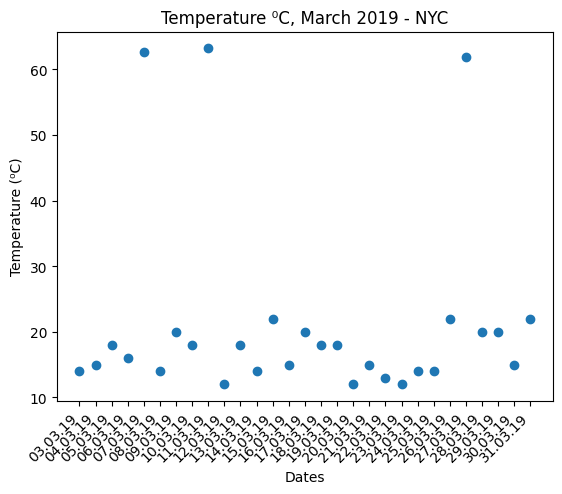

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x="Date", y="Temperature", data=temperatures)
plt.title("Temperature ⁰C, March 2019 - NYC")
plt.xlabel("Dates")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Temperature (⁰C)")
plt.show()

We see there are two other dates with data that seems suspicious.

Given that the formula for converting Celsius to Fahrenheit is: $C = (F-32) \times \frac{5}{9}$ we can correct this issue as follows:

In [ ]:
temp_f = temperatures.loc[temperatures["Temperature"] > 40, "Temperature"]
temp_c = (temp_f - 32) * (5 / 9)
temperatures.loc[temperatures["Temperature"] > 40, "Temperature"] = temp_c

assert temperatures["Temperature"].max() < 40

And confirm it with another quick scatterplot:

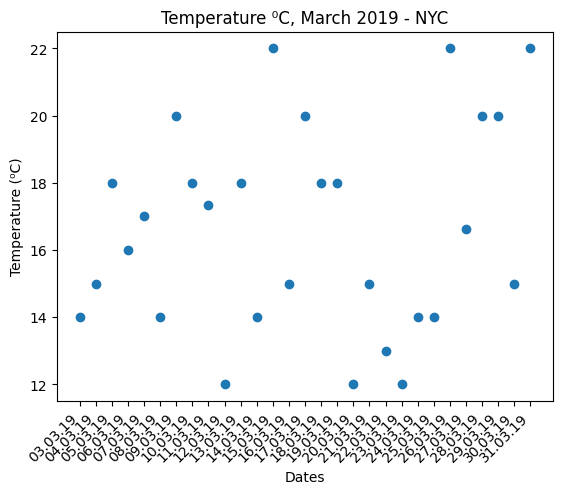

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x="Date", y="Temperature", data=temperatures)
plt.title("Temperature ⁰C, March 2019 - NYC")
plt.xlabel("Dates")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Temperature (⁰C)")
plt.show()

Another common uniformity issue is dates with inconsistent formats.

In [ ]:
import pandas as pd
from pathlib import Path

birthdays = pd.read_csv(Path.cwd() / "data/birthdays.csv")
birthdays.head()

,Birthday,First name,Last name
0,27/27/2016,Jo,Savell
1,09-04-11,Nicko,Dawtrey
2,"December 29, 2014",Cleavland,Roust
3,5/11/2018,Erie,Iacavone
4,"October 24, 2005",Batsheva,Ivashnikov


Here we see a variety of date formats and what appears to be an error in the first observation with a date-date-year format(??).

#### Datetime formatting

| Date | `datetime` format |
|------|-------------------|
| 25-12-2019 | `%d-%m-%Y` |
| December 25, 2019 | `%c` |
| 12-25-2019 | `%m-%d-%y` |

`pandas.to_datetime()`

* can recognize most formats automatically
* sometimes fails with erroneous or unrecognizable formats

#### Treating date data

```python
birthdays["Birthday"] = pd.to_datetime(
    birthdays["Birthday"],
    # attempt to infer format of each date
    infer_datetime_format=True,
    # return NA when conversion fails
    errors="coerce",
)
```

`infer_datetime_format` is deprecated and will be removed in a future version. A strict version of it is now the default, see [https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html](https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html). The argument can safely be removed.



In [ ]:
import pandas as pd
from pathlib import Path

birthdays = pd.read_csv(Path.cwd() / "data/birthdays.csv")
birthdays["Birthday"] = pd.to_datetime(
    birthdays["Birthday"],
    # attempt to infer format of each date
    # infer_datetime_format=True,
    # return (N)ot-(A)-(T)ime when conversion fails
    errors="coerce",
)

birthdays.head()

/tmp/ipykernel_8816/1856432684.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  birthdays["Birthday"] = pd.to_datetime(


,Birthday,First name,Last name
0,NaT,Jo,Savell
1,2011-09-04,Nicko,Dawtrey
2,2014-12-29,Cleavland,Roust
3,2018-05-11,Erie,Iacavone
4,2005-10-24,Batsheva,Ivashnikov


You can set the format of the datetime variable as follows:

In [ ]:
birthdays["Birthday"] = birthdays["Birthday"].dt.strftime("%d-%m-%Y")

birthdays.head()

,Birthday,First name,Last name
0,NaN,Jo,Savell
1,04-09-2011,Nicko,Dawtrey
2,29-12-2014,Cleavland,Roust
3,11-05-2018,Erie,Iacavone
4,24-10-2005,Batsheva,Ivashnikov


#### Treating ambiguous date data

*Is `2019-03-08` in August or March?*

It may be hard to tell.

* Convert to `NaT` and treat accordingly
* Infer format by understanding data source
* Infer format by understanding previous and subsequent data in the DataFrame

### Uniform currencies

In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the `banking` DataFrame. The dataset contains data on the amount of money stored in accounts (`acct_amount`), their currency (`acct_cur`), amount invested (`inv_amount`), account opening date (`account_opened`), and last transaction date (`last_transaction`) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The `pandas` package has been imported as pd, and the ban`king DataFrame is in your environment.

##### Instructions

* Find the rows of `acct_cur` in `banking` that are equal to `'euro'` and store them in the variable `acct_eu`.
* Find all the rows of `acct_amount` in banking that fit the `acct_eu` condition, and convert them to USD by multiplying them with `1.1`.
* Find all the rows of `acct_cur` in `banking` that fit the `acct_eu` condition, set them to `'dollar'`.


In [ ]:
import pandas as pd
from pathlib import Path

banking = pd.read_csv(Path.cwd() / "data/banking.csv")

# Find values of acct_cur that are equal to 'euro'
acct_eu = banking["acct_cur"] == "euro"

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, "acct_amount"] = banking.loc[acct_eu, "acct_amount"] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, "acct_cur"] = "dollar"

# Assert that only dollar currency remains
assert banking["acct_cur"].unique() == "dollar"

### Uniform dates

After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The `account_opened` column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a `datetime` object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The `banking` DataFrame is in your environment and `pandas` was imported as `pd`.

##### Instructions 1/4

* Print the header of account_opened from the banking DataFrame and take a look at the different results.


In [ ]:
# Print the header of account_opened
print(banking["account_opened"].head())

0            29-04-18
1            09-06-18
2            09-09-17
3    January 26, 2018
4            15-07-18
Name: account_opened, dtype: object


##### Instructions 2/4

**Question**

Take a look at the output. You tried converting the values to `datetime` using the default `to_datetime()` function without changing any argument, however received the following error:

```python
ValueError: month must be in 1..12
```

Why do you think that is?

**Possible answers**

1. The `to_datetime()` function needs to be explicitly told which date format each row is in.
2. The `to_datetime()` function can only be applied on `YY-mm-dd` date formats.
3. The `21-14-17` entry is erroneous and leads to an error.

**Answer**

3. The `21-14-17` entry is erroneous and leads to an error.

##### Instructions 3/4

* Convert the `account_opened` column to `datetime`, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.


In [ ]:
# Convert account_opened to datetime
banking["account_opened"] = pd.to_datetime(
    banking["account_opened"],
    # Infer datetime format
    # infer_datetime_format=True,
    # Return missing value for error
    errors="coerce",
)

/tmp/ipykernel_8816/1324529731.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banking["account_opened"] = pd.to_datetime(


##### Instructions 4/4

* Extract the year from the amended `account_opened` column and assign it to the `acct_year` column.
* Print the newly created `acct_year` column.

In [ ]:
# Convert account_opened to datetime
banking["account_opened"] = pd.to_datetime(
    banking["account_opened"],
    # Infer datetime format
    infer_datetime_format=True,
    # Return missing value for error
    errors="coerce",
)

# Get year of account opened
banking["acct_year"] = banking["account_opened"].dt.strftime("%Y")

# Print acct_year
print(banking["acct_year"])

0     2018
1     2018
2     2017
3     2018
4     2018
      ... 
95    2018
96    2018
97    2018
98    2018
99    2018
Name: acct_year, Length: 100, dtype: object


/tmp/ipykernel_8816/585772761.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  banking["account_opened"] = pd.to_datetime(


### Cross field validation

*The use of **multiple** fields in a dataset to sanity check data integrity*

Consider:

```python
import pandas as pd

flights = pd.read_csv('flights.csv')
flights.head()
```

```text
   flight_number economy_class  business_class  first_class  total_passengers
0          DL140           100              60           40               200
1          BA248           130             100           70               300
2         MEA124           100              50           50               200
3         AFR939           140              70           90               300
4         TKA101           130             100           20               250
```

For example, summing economy, business, and first class to ensure they add up to the listed total passengers.

In pandas

1. subset the columns to be summed, then using the `.sum()` method with `axis = 1` to indicate row wise summing.
2. find instances where the total passengers column is equal to the sum of the classes
3. find and filter out rows with inconsistent passenger totals

```python
sum_classes = flights[['economy_class', 'business_class', 'first_class']].sum(axis = 1)  # 1
passenger_equ = sum_classes == flights['total_passengers']  # 2
inconsistent_pass = flights[~passenger_equ]  # 3
consistent_pass = flights[passenger_equ]  # 3
```

Another example, checking that age is correct

```python
users.head()
```

```text
   user_id  Age    Birthday
0	  32985   22  1998-03-02
1	  94387   27  1993-12-04
2	  34236   42  1978-11-24
3	  12551   31  1989-01-03
4	  55212   18  2002-07-02
```

```python
import pandas as pd
import datetime as dt

# convert to datetime
users['Birthday'] = pd.to_datetime(users['Birthday'])
# get today's date
today = dt.date.today()
# calculate the year difference for each user
age_manual = today.year - users['Birthday'].dt.year
# find all observations where ages match
age_equ = age_manual == users['Age']
# find and filter rows with inconsistent age
inconsistent_age = users[~age_equ]
consistent_age = users[age_equ]
```

#### What to do when we catch inconsistencies?

No one-size-fits-all solution.

Requires understanding of our dataset.

* drop data
* set to missing and impute
* apply rules from domain knowledge

### How's our data integrity?

New data has been merged into the `banking` DataFrame that contains details on how investments in the `inv_amount` column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the `age` and `birth_date` columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of `inv_amount` and `age` against the amount invested in different funds and customers' birthdays. Both `pandas` and `datetime` have been imported as `pd` and `dt` respectively.

##### Instructions 1/2

  * Find the rows where the sum of all rows of the `fund_columns` in `banking` are equal to the `inv_amount` column.
  * Store the values of `banking` with consistent `inv_amount` in `consistent_inv`, and those with inconsistent ones in `inconsistent_inv`.

In [ ]:
import pandas as pd
from pathlib import Path

banking = pd.read_csv(Path.cwd() / "data/banking.csv")

# Store fund columns to sum against
fund_columns = ["fund_A", "fund_B", "fund_C", "fund_D"]

# Find rows where fund_columns row sum == inv_amount
inv_equ = (
    banking[["fund_A", "fund_B", "fund_C", "fund_D"]].sum(axis=1)
    == banking["inv_amount"]
)

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  51


##### Instructions 2/2

* Store today's date into `today`, and manually calculate customers' ages and store them in `ages_manual`.
* Find all rows of `banking` where the `age` column is equal to `ages_manual` and then filter banking into `consistent_ages` and `inconsistent_ages`.

In [ ]:
# Store today's date and find ages
import datetime as dt

# Convert birth_date to datetime
banking["birth_date"] = pd.to_datetime(
    banking["birth_date"],
    # Return missing value for error
    errors="coerce",
)

today = dt.date.today()

# compute true ages
ages_manual = today.year - banking["birth_date"].dt.year

# Find rows where age column == ages_manual
age_equ = banking["age"] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  95


### Completeness

Missing data is when no data value is stored for a variable in an observation.

Can be represented as `NA`, `NaT`, `nan`, `0`, `.`, ...

```python
import pandas as pd
airquality = pd.read_csv(‘airquality.csv‘)
print(airquality)
```

```text
	        Date  Temperature  C02
987   20/04/20O4         16.8  0.0
2119  07/06/2004         18.7  0.8
2451  20/06/2004        -40.0  NaN
1984  01/06/2004         19.6  1.8
8299  19/02/2005         11.2  1.2
```

Find rows with missing data

```python
airquality.isna()
```

```text
	   Date  Temperature    C02
987   False        False  False
2119  False        False  False  
2451  False        False   True  
1984  False        False  False  
8299  False        False  False  
```

Get a breakdown of missing values in the data frame.

```python
airquality.isna().sum()
```

```text
Date           0
Temperature    0
CO2          366
dtype: int64
```

We see that `CO2` is the only column with missing data. Let's explore why.

#### Missingno

*Useful package for visualizing missing data.*

```python
import missingno as msno
import matplotlib.pyplot as plt

# visualize missingness
msno.matrix(airquality)
plt.show()
```

![output from missingno](images/missingno_output.png)

The matrix shows that the missing values are found in only one column and appear to be randomly distributed. Let's explore further.

```python
# isolate missing and complete values
missing = airquality[airquality['CO2'].isna()]
complete = airquality[~airquality['CO2'].isna()]
```

```python
# describe complete DataFrame
complete.describe()
```

```text
       Temperature          C02
count  8991.000000  8991.000000
mean     18.317829     1.739584
std       8.832116     1.537580
min      -1.900000     0.000000
...    ...          ...
max      44.600000    11.900000
```


```python
# describe missing DataFrame
missing.describe()
```

```text
       Temperature  C02
count   366.000000  0.0
mean    -39.655738  NaN
std       5.988716  NaN
min     -49.000000  NaN
...    ...          ...
max     -30.000000  NaN
```

With this we see that the missing CO2 values happen on days with low temperatures, with the mean temperature at -39 degrees and a minimum and maximum temperature of -49 and -30 degrees respectively.

```python
# confirm our findings using missingno
sorted_airquality = ariquality.sort_values(by = 'Temperature')
msno.matrix(sorted_airquality)
plt.show()
```

![Alt text](images/sorted_missingno_output.png)

Notice how all the missing values are at the top? This is because we sort largest to smallest. This seems to confirm that CO2 measurements are lost on cold days. Must be a sensor failure!

#### Missingness types

There variety of types of missing data. It could missing completely at random, missing at random, or missing not at random. 

* Missing Completely at Random (MCAR)
* Missing at Random (MAR)
* Missing Not at Random (MNAR)

| Missing Completely at Random (MCAR) | Missing at Random (MAR) | Missing Not at Random (MNAR) |
|------------------------------|-------------------|-----------------------|
| No systemic relationship between missing data and other values | Systematic relationship between missing data and other **observed** values | Systematic relationship between missing data and other **unobserved** values |
| Data entry errors when inputting data | Like our missing CO2 data at low temperatures | High temperatures may exceed out thermometer's ability to measure them but we cannot tell this from just the data  |

#### How to deal with missing data?

Simple approaches:

1. dropping missing data
2. impute with statistical methods

More complex approaches:

1. Imputing using an algorithmic approach
2. Impute with machine learning models

```python
# drop missing values
airquality.dropna(subset = ['CO2'])
```

```python
# impute with statistical methods
co2_mean = airquality['CO2'].mean()
airquality.fillna({'CO2': co2_mean})
```

### Missing investors

Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the `banking` DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing `inv_amount` values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The `pandas`, `missingno` and `matplotlib.pyplot` packages have been imported as `pd`, `msno` and `plt` respectively. The `banking` DataFrame is in your environment.

##### Instructions 1/4

* Print the number of missing values by column in the `banking` DataFrame.
* Plot and show the missingness matrix of `banking` with the `msno.matrix()` function.

cust_id              0
age                  0
acct_amount          0
inv_amount          17
account_opened       0
last_transaction     0
dtype: int64


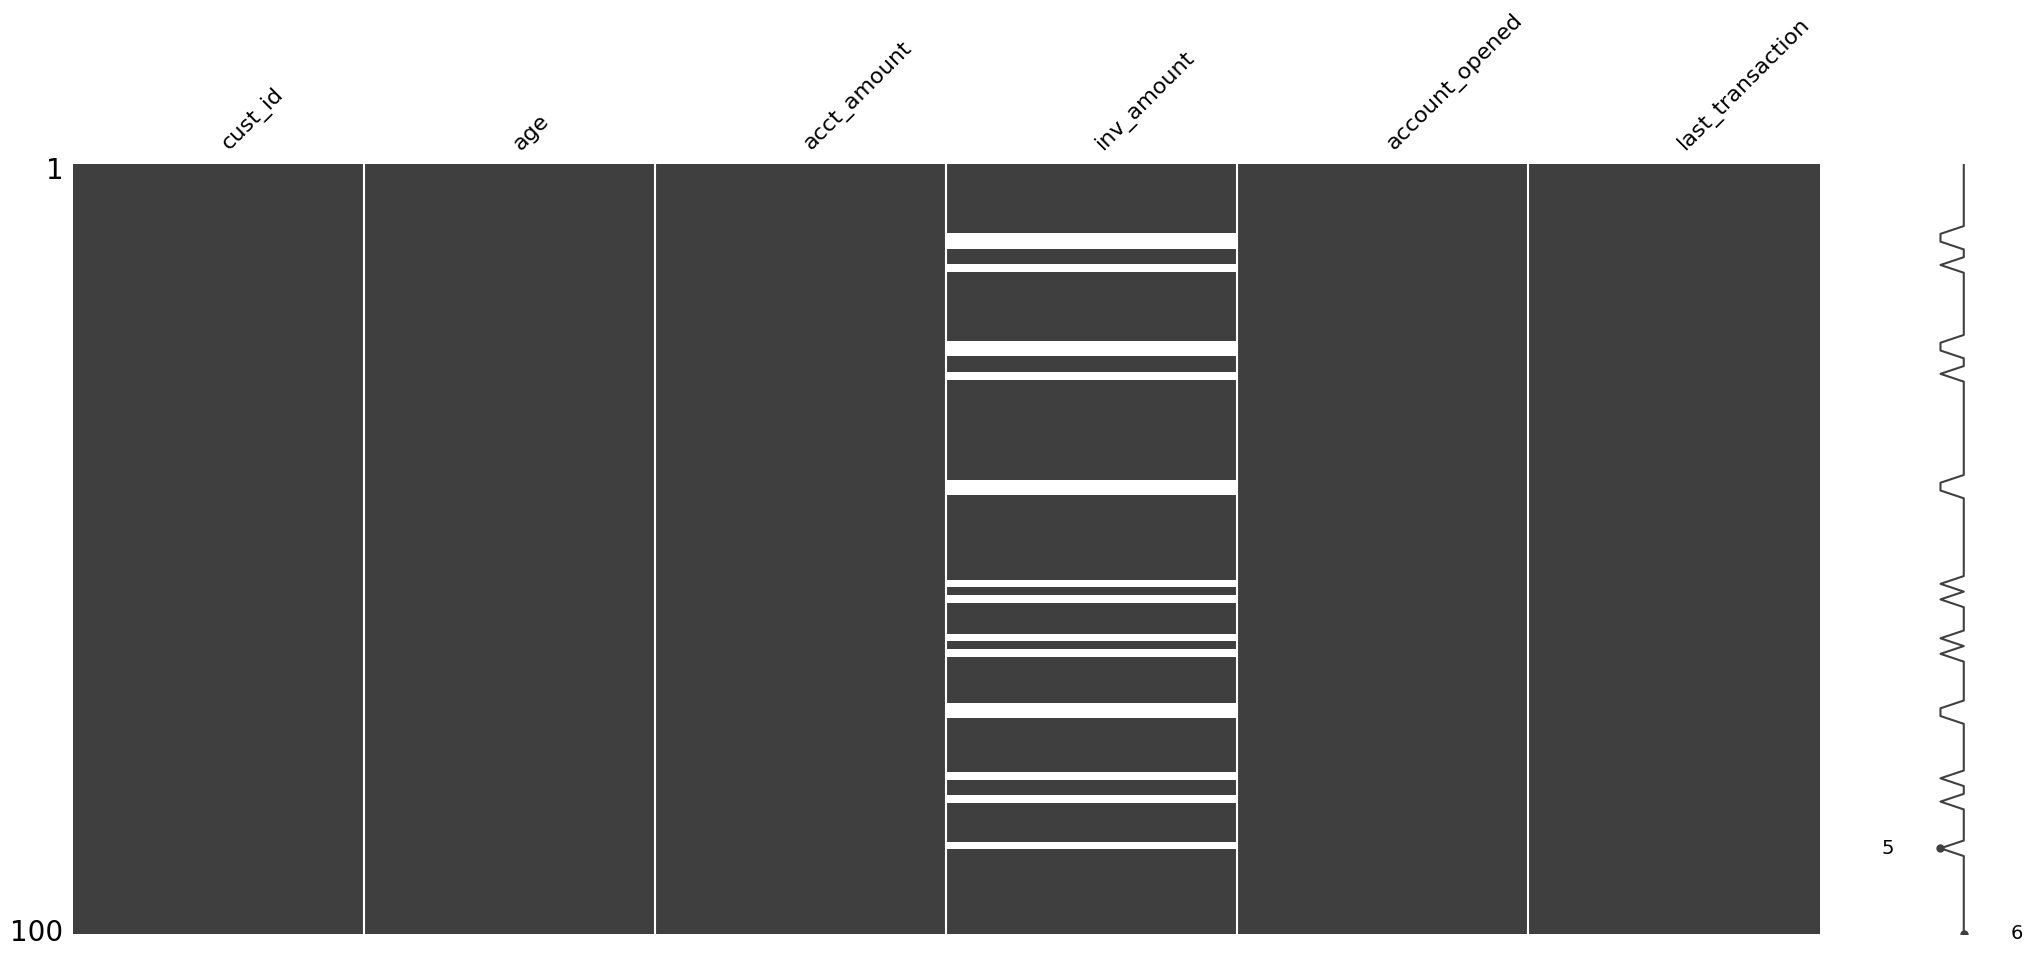

In [ ]:
import pandas as pd
from pathlib import Path

import missingno as msno
import matplotlib.pyplot as plt

banking2 = pd.read_csv(Path.cwd() / "data/banking2.csv")

# Print number of missing values in banking
print(banking2.isna().sum())

# Visualize missingness matrix
msno.matrix(banking2)
plt.show()

##### Instructions 2/4

* Isolate the values of `banking` missing values of `inv_amount` into `missing_investors` and with non-missing `inv_amount` values into `investors`.


In [ ]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking2[banking2["inv_amount"].isna()]
investors = banking2[~banking2["inv_amount"].isna()]

##### Instructions 3/4

**Question**

Now that you've isolated `banking` into `investors` and missi`ng_investors, use the `.describe()` method on both of these DataFrames in the IPython shell to understand whether there are structural differences between them. What do you think is going on?

**Possible answers**

1. The data is missing completely at random and there are no drivers behind the missingness.
2. The `inv_amount` is missing only for young customers, since the average age in `missing_investors` is 22 and the maximum age is 25.
3. The `inv_amount` is missing only for old customers, since the average age in `missing_investors` is 42 and the maximum age is 59.

**Answer**
2. The `inv_amount` is missing only for young customers, since the average age in `missing_investors` is 22 and the maximum age is 25 (for the site's data).

In [ ]:
missing_investors.describe()

,age,acct_amount,inv_amount
count,17.000000,17.000000,0.0
mean,23.823529,60704.288824,NaN
std,1.014599,25509.051307,NaN
min,22.000000,12832.940000,NaN
25%,23.000000,45162.570000,NaN
50%,24.000000,62047.550000,NaN
75%,25.000000,79991.090000,NaN
max,25.000000,95381.490000,NaN


In [ ]:
investors.describe()

,age,acct_amount,inv_amount
count,83.000000,83.000000,83.000000
mean,38.240964,54390.773735,53688.529639
std,6.945064,24156.316678,26895.978357
min,27.000000,12034.980000,12597.840000
25%,32.500000,36942.575000,28803.835000
50%,37.000000,52491.750000,56564.650000
75%,43.000000,74194.870000,75319.725000
max,52.000000,98740.250000,99407.340000


##### Instructions 4/4

* Sort the `banking` DataFrame by the `age` column and plot the missingness matrix of `banking_sorted`.


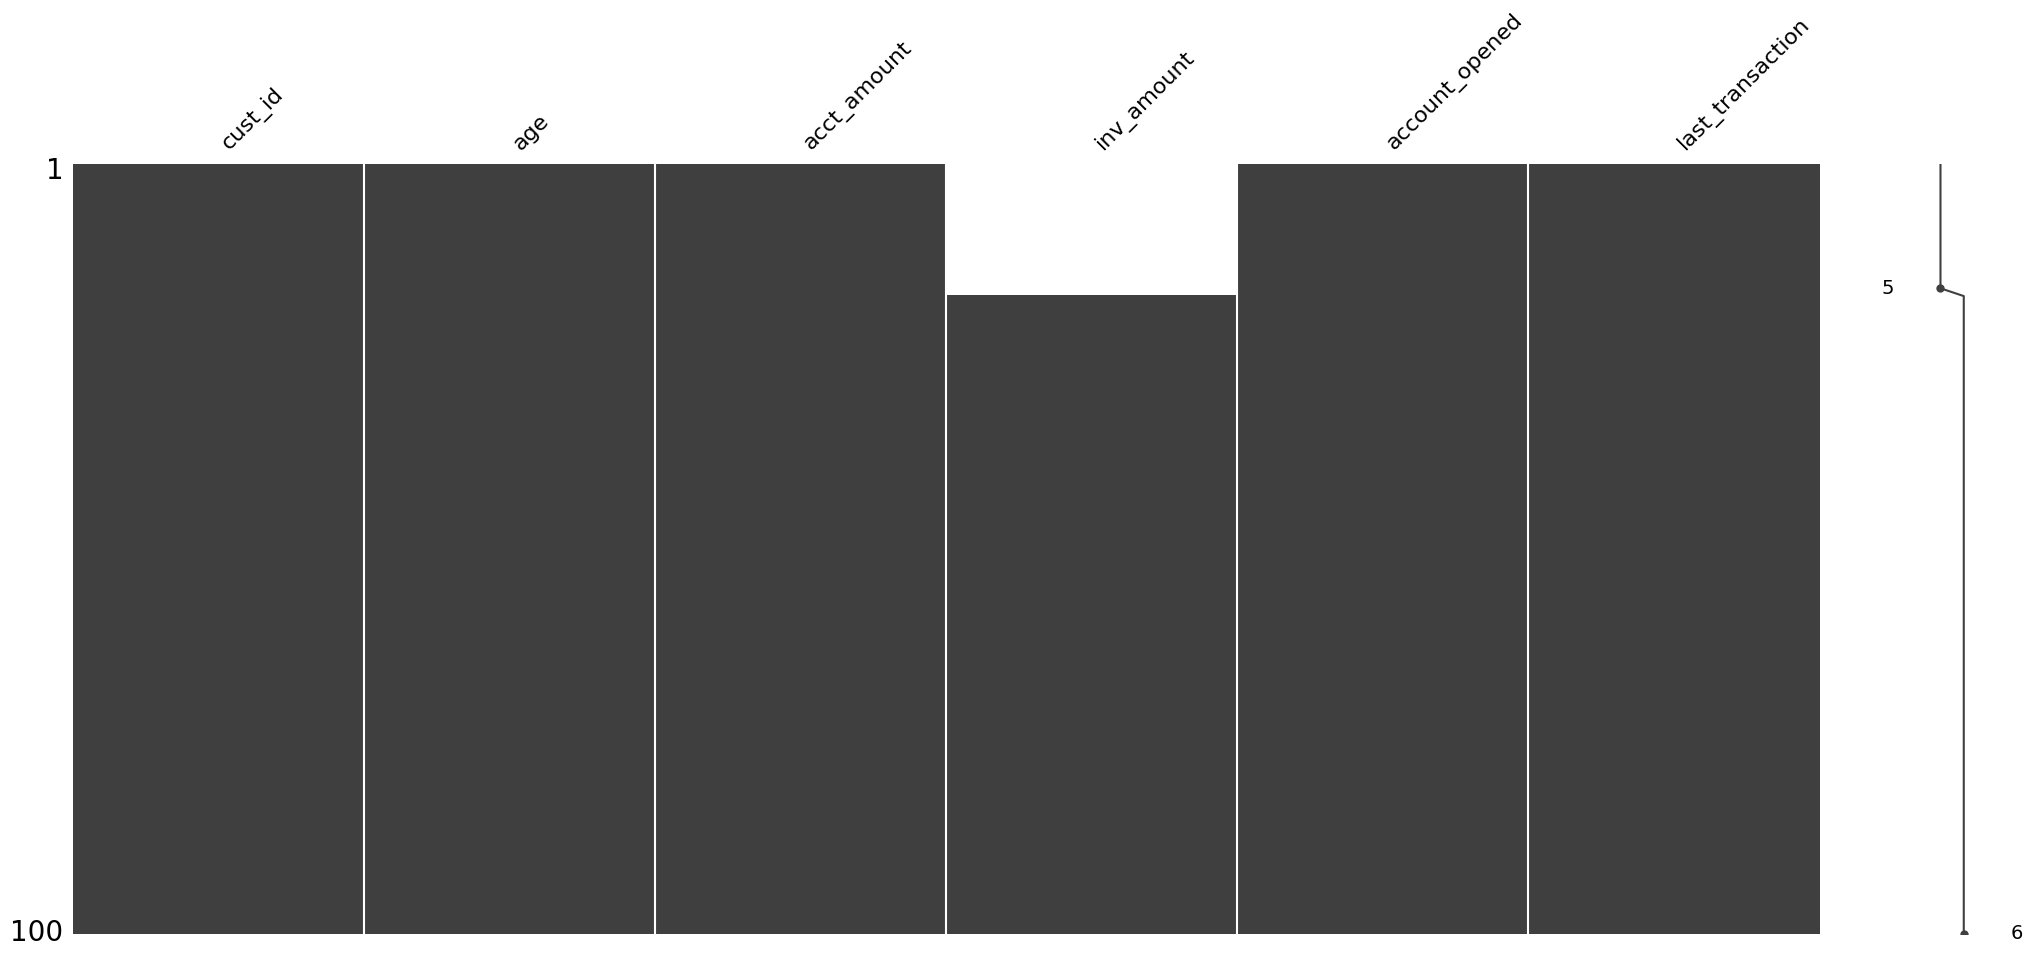

In [ ]:
banking2_sorted = banking2.sort_values(by="age")
msno.matrix(banking2_sorted)
plt.show()

### Follow the money

In this exercise, you're working with another version of the `banking` DataFrame that contains missing values for both the `cust_id` column and the `acct_amount` column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing `cust_id` don't really help you, and that on average `acct_amount` is usually 5 times the amount of `inv_amount`.

In this exercise, you will drop rows of `banking` with missing `cust_id`s, and impute missing values of `acct_amount` with some domain knowledge.

##### Instructions

* Use `.dropna()` to drop missing values of the `cust_id` column in `banking` and store the results in `banking_fullid`.
* Use `inv_amount` to compute the estimated account amounts for banking_fullid by setting the amounts equal to `inv_amount * 5`, and assign the results to `acct_imp`.
* Impute the missing values of `acct_amount` in `banking_fullid` with the newly created `acct_imp` using .`fillna()`.


In [ ]:
import pandas as pd
from pathlib import Path

import missingno as msno
import matplotlib.pyplot as plt

banking3 = pd.read_csv(Path.cwd() / "data/banking3.csv")

# Drop missing values of cust_id
banking_fullid = banking3.dropna(subset=["cust_id"])

# Compute estimated acct_amount
acct_imp = banking_fullid["inv_amount"] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({"acct_amount": acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
acct_amount         0
inv_amount          0
account_opened      0
last_transaction    0
dtype: int64


## Record linkage

Record linkage is a powerful technique used to merge multiple datasets together, used when values have typos or different spellings. In this chapter, you'll learn how to link records by calculating the similarity between strings—you’ll then use your new skills to join two restaurant review datasets into one clean master dataset.

### Comparing strings

#### Minimum edit distance

Minimum edit distance is a systematic way to identify how close 2 strings are.

For example, let's take a look at the following two words: *intention*, and *execution*.

The minimum edit distance between them is the least possible amount of steps, that could get us from the word intention to execution, with the available operations being:

* inserting new characters
* deleting them
* substituting them
* transposing consecutive characters

To get from intention to execution:

1. Delete "i" - ntention - MED = 1
1. Insert "c" between "e" and "n" - ntecntion - MED = 2
1. Substitute the first "n" with "e" - etecntion - MED = 3
1. Substitute the first "t" with "x" - execntion - MED = 4
1. Substitute the first "n" with"u" - execution - MED = 5

The lower the minimum edit distance, the closer two words are.

There are a variety of algorithms based on edit distance that differ on which operations they use, how much weight attributed to each operation, which type of strings they're suited for and more...

| Algorithm | Operations |
|-----------|------------|
| Damerau-Levenshtein | insertion, substitution, deletion, transposition |
| Levenshtein | insertion, substitution, deletion |
| Hamming | substitution only |
| Jaro distance | transposition only |
| ... | ... |

There are also a variety of packages to get each similarity: `nltk`, `thefuzz`, `textdistance`, ...

#### Simple string comparison

In [ ]:
from thefuzz import fuzz

# compare reeding vs reading
fuzz.WRatio("reeding", "reading")

86

Output is a score on a scale of 0 to 100 with 0 being not similar at all and 100 being an exact match.

This score is **not** the minimum edit distance.

#### Partial strings and different orderings

The WRatio function is highly robust against partial string comparison with different orderings. For example here we compare the strings Houston Rockets and Rockets and get a high similarity score.

In [ ]:
from thefuzz import fuzz

# compare reeding vs reading
fuzz.WRatio("Houston Rockets", "rockets")

90

The same can be said for the strings Houston Rockets vs Los Angeles Lakers and Lakers vs Rockets, where the team names are only partial and they are differently ordered.

In [ ]:
from thefuzz import fuzz

# compare reeding vs reading
fuzz.WRatio("Houston Rockets vs Los Angeles Lakers", "Lakers vs Rockets")

86

In [ ]:
from thefuzz import process

string = "Houston Rockets vs Los Angeles Lakers"
choices = pd.Series(
    [
        "Rockets vs Lakers",
        "Lakers vs Rockets",
        "Houston vs Los Angeles",
        "Heat vs Bulls",
        "Spam vs ham",
        "foobar",
    ]
)
process.extract(string, choices, limit=10)

[('Rockets vs Lakers', 86, 0),
 ('Lakers vs Rockets', 86, 1),
 ('Houston vs Los Angeles', 86, 2),
 ('Heat vs Bulls', 86, 3),
 ('Spam vs ham', 86, 4),
 ('foobar', 33, 5)]

### Collapsing categories with string similarity

Collapsing data into categories is essential to working with categorical and text data.

### Collapsing all of the state

Say we have DataFrame named `survey` containing answers from respondents from the state of New York and California asking them how likely are you to move on a scale of 0 to 5. The state field was free text and contains hundreds of typos. Remapping them manually would take a huge amount of time. Instead, we'll use string similarity. We also have a `category` DataFrame containing the correct categories for each state. Let's collapse the incorrect categories with string matching! 

Iterate over the correctly typed states and for each one find its matches in the state column of the survey DataFrame, returning all possible matches by setting the `limit` argument to the length of the `survey` DataFrame.

In [ ]:
import pandas as pd
from pathlib import Path
from thefuzz import process

survey = pd.read_csv(Path.cwd() / "data/survey.csv")
categories = pd.read_csv(Path.cwd() / "data/states.csv")

# for each correctly spelled state
for state in categories["state"]:
    # find potential matches in states with typos
    matches = process.extract(state, survey["state"], limit=survey.shape[0])
    # for each potential match
    for potential_match in matches:
        # if high similarity score
        if potential_match[1] >= 80:
            # replace typo with correct category
            survey.loc[survey["state"] == potential_match[0], "state"] = state

### Record linkage

Record linkage attempts to join data sources that have similarly fuzzy duplicate values, so that we end up with a final DataFrame with no duplicates by using string similarity. 

![Alt text](images/record_linkage_marked_up.png)

### The cutoff point

In this exercise, and throughout this chapter, you'll be working with the `restaurants` DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of `restaurants` has been collected from many sources, where the `cuisine_type` column is riddled with typos, and should contain only `italian`, `american` and `asian` cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the `thefuzz`'s `process.extract()` function by finding the similarity score of the most *distant* typo of each category.

##### Instructions 1/2

* Import process from `thefuzz`.
* Store the unique `cuisine_types` into `unique_types`.
* Calculate the similarity of `'asian'`, `'american'`, and `'italian'` to all possible cuisine_types using `process.extract()`, while returning all possible matches.

In [ ]:
import pandas as pd
from pathlib import Path
from thefuzz import process

restaurants = pd.read_csv(Path.cwd() / "data/restaurants.csv")

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants["cuisine_type"].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract("asian", unique_types, limit=len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract("american", unique_types, limit=len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract("italian", unique_types, limit=len(unique_types)))

[('asian', 100), ('indonesian', 80), ('californian', 68), ('italian', 67), ('russian', 67), ('american', 62), ('japanese', 54), ('mexican/tex-mex', 54), ('american ( new )', 54), ('mexican', 50), ('fast food', 45), ('middle eastern', 43), ('steakhouses', 40), ('pacific new wave', 40), ('pizza', 40), ('diners', 36), ('cajun/creole', 36), ('vietnamese', 36), ('continental', 36), ('seafood', 33), ('chicken', 33), ('chinese', 33), ('hot dogs', 30), ('hamburgers', 30), ('coffee shops', 30), ('noodle shops', 30), ('southern/soul', 30), ('desserts', 30), ('eclectic', 26), ('coffeebar', 26), ('health food', 22), ('french ( new )', 22), ('delis', 20)]
[('american', 100), ('american ( new )', 90), ('mexican', 80), ('mexican/tex-mex', 72), ('asian', 62), ('italian', 53), ('russian', 53), ('californian', 53), ('middle eastern', 51), ('southern/soul', 47), ('pacific new wave', 45), ('hamburgers', 44), ('indonesian', 44), ('cajun/creole', 42), ('chicken', 40), ('pizza', 40), ('japanese', 38), ('ecle

##### Instructions 2/2

**Question**

Take a look at the output, what do you think should be the similarity cutoff point when remapping categories?

**Possible answers**

1. 80
2. 70
3. 60

**Answer**

1. 80

### Remapping categories II

In the last exercise, you determined that the distance cutoff point for remapping typos of `'american'`, `'asian'`, and `'italian'` cuisine types stored in the `cuisine_type` column should be 80.

In this exercise, you're going to put it all together by finding matches with similarity scores equal to or higher than 80 by using `fuzywuzzy.process`'s `extract()` function, for each correct cuisine type, and replacing these matches with it. Remember, when comparing a string with an array of strings using `process.extract()`, the output is a list of tuples where each is formatted like:

```python
(closest match, similarity score, index of match)
```

The `restaurants` DataFrame is in your environment, and you have access to a `categories` list containing the correct cuisine types (`'american'`, `'asian'`, and `'italian'`).

##### Instructions 1/4

* Return all of the unique values in the `cuisine_type` column of `restaurants`.


In [ ]:
import pandas as pd
from pathlib import Path

restaurants = pd.read_csv(Path.cwd() / "data/restaurants_misspelled_cuisine_types.csv")

print(restaurants["cuisine_type"].unique())

['amurican' 'american' 'amerrican' 'amerycan' 'ammereican' 'italiano'
 'americano' 'italien' 'italiian' 'ameerican' 'americin' 'itallian'
 'asiat' 'america' 'italiaan' 'asianne' 'asiann' 'ameriican' 'italianne'
 'murican' 'ammericann' 'aamerican' 'americen' 'ameerrican' 'merican'
 'asiaan' 'asiian' 'italian' 'asiane' 'itali' 'americann' 'italiann'
 'asian']


##### Instructions 2/4

Okay! Looks like you will need to use some string matching to correct these misspellings!

* As a first step, create a list of all possible `matches`, comparing `'italian'` with the restaurant types listed in the `cuisine_type` column.

In [ ]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract(
    "italian", restaurants["cuisine_type"], limit=restaurants.shape[0]
)

# Inspect the first 5 matches
print(matches[0:5])

[('italian', 100, 65), ('italian', 100, 68), ('italian', 100, 70), ('italian', 100, 103), ('italian', 100, 125)]


##### Instructions 3/4
Now you're getting somewhere! Now you can iterate through matches to reassign similar entries.

* Within the `for` loop, use an `if` statement to check whether the similarity score in each `match` is greater than or equal to 80.
* If it is, use `.loc` to select rows where `cuisine_type` in `restaurants` is *equal* to the current match (which is the first element of `match`), and reassign them to be `'italian'`.

In [ ]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract(
    "italian", restaurants["cuisine_type"], limit=len(restaurants.cuisine_type)
)

# Iterate through the list of matches to italian
for match in matches:
    # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
        # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
        restaurants.loc[restaurants["cuisine_type"] == match[0]] = "italian"

/tmp/ipykernel_23242/2731569381.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'italian' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  restaurants.loc[restaurants["cuisine_type"] == match[0]] = "italian"


##### Instructions 4/4

Finally, you'll adapt your code to work with every restaurant type in `categories`.

* Using the variable `cuisine` to iterate through `categories`, embed your code from the previous step in an outer `for` loop.
* Inspect the final result.

In [ ]:
categories = ["american", "asian", "italian"]

for cuisine in categories:
    # Create a list of matches, comparing cuisine with the cuisine_type column
    matches = process.extract(
        cuisine, restaurants["cuisine_type"], limit=len(restaurants.cuisine_type)
    )

    for match in matches:
        if match[1] >= 80:  # similarity score >= 80
            restaurants.loc[restaurants["cuisine_type"] == match[0]] = cuisine

# Inspect the final result
print(restaurants["cuisine_type"].unique())

['american' 'italian' 'asian']


### Generating pairs

Here are two DataFrames containing NBA games and their schedules. They've both been scraped from different sites and we would want to merge them together and have one DataFrame containing all unique games. 

![Alt text](images/record_linkage.png)

Since there are games happening at the same time, no common unique identifier between the DataFrames, and the events are differently named, a regular join or merge will not work. This is where record linkage comes in.

![Alt text](images/record_linkage_marked_up.png)

*Record linkage* is the act of linking data from different sources regarding the same entity.

Generally, we clean two or more DataFrames, generate pairs of potentially matching records, score these pairs according to string similarity and other similarity metrics, and link them. 

All of these steps can be achieved with the `recordlinkage` package, let's find how! 

![Alt text](images/record_linkage_flow.png)

#### Our DataFrames

Here we have two DataFrames containing census data that we want to merge. Since the data was collected manually and are prone to typos, there are no consistent IDs between them.

![Alt text](images/census_data_frames.png)

We'll want to generate pairs between the DFs. We could generate *all possible pairs* but this does not scale.

Instead, we'll apply *blocking* which creates pairs based on a matching column (the state, in this case).This will reduce the number of pairs that need to be evaluated later.

```python
import recordlinkage

# create indexing object
indexer = recordlinkage.Index()

# generate pairs blocked on state
indexer.block('state')
pairs = indexer.index(census_A, census_B)
```

The result is a pandas MultiIndex, containing pairs of row indices from both DataFrames, which is a fancy way to say it is an array containing possible pairs of indices that makes it much easier to subset DataFrames on. 

![Alt text](images/pairs.png)

Now that we've generated the pairs, let's compare the matches.

```python
# generate the pairs
pairs = indexer.index(census_A, census_B)

# create a compare object
compare_cl = recordlinkage.Compare()

# find exact matches for pairs of date of birth and state
compare_cl.exact('date_of_birth', 'date_of_birth', label='date_of_birth') 
compare_cl.exact('state', 'state', label='state')

# fuzzy find similar matches for pairs of surname and address_1 using string similarity
compare_cl.string('surname', 'surname', label='surname', threshold=0.85)
compare_cl.string('address_1', 'address_1', label='address_1', threshold=0.85)

# find matches
potential_matches = compare_cl.compute(pairs, census_A, census_B)
```

**Note:** you *must* always have the same order of DataFrames when generating paris, comparing between columns, and computing comparisons.

The output is a MultiIndex DataFrame where the fist index is the row index from the first DF and the second index is a list of all row indices from the second DF.

The columns are the  columns being compared with values being 1 for a match and 0 for not a match.

![Alt text](images/potential_matches.png)

To find potential matches, we filter for rows whose sum is greater than a chosen threshold.

### Pairs of restaurants

In the last lesson, you cleaned the `restaurants` dataset to make it ready for building a restaurants recommendation engine. You have a new DataFrame named `restaurants_new` with new restaurants to train your model on, that's been scraped from a new data source.

You've already cleaned the `cuisine_type` and `city` columns using the techniques learned throughout the course. However you saw duplicates with typos in restaurants names that require record linkage instead of joins with `restaurants`.

In this exercise, you will perform the first step in record linkage and generate possible pairs of rows between `restaurants` and `restaurants_new`. Both DataFrames, `pandas` and `recordlinkage` are in your environment.

##### Instructions 1/2

* Instantiate an indexing object by using the `Index()` function from `recordlinkage`.
* Block your pairing on `cuisine_type` by using `indexer`'s' `.block()` method.
* Generate pairs by indexing `restaurants` and `restaurants_new` in that order.


In [22]:
import pandas as pd
import recordlinkage

from pathlib import Path

restaurants = pd.read_csv(Path.cwd() / "data/restaurants_L2.csv", index_col=0)
restaurants_new = pd.read_csv(Path.cwd() / "data/restaurants_new.csv", index_col=0)

# create indexer
indexer = recordlinkage.Index()

# block on pairing cuisine_type
indexer.block("cuisine_type")

# generate pairs
pairs = indexer.index(restaurants, restaurants_new)

##### Instructions 2/2

**Question**

Now that you've generated your pairs, you've achieved the first step of record linkage. What are the steps remaining to link both restaurants DataFrames, and in what order?

**Possible answers**

1. Compare between columns, score the comparison, then link the DataFrames.
2. Clean the data, compare between columns, link the DataFrames, then score the comparison.
3. Clean the data, compare between columns, score the comparison, then link the DataFrames.

**Answer**

1. Compare between columns, score the comparison, then link the DataFrames.

### Similar restaurants

In the last exercise, you generated pairs between `restaurants` and `restaurants_new` in an effort to cleanly merge both DataFrames using record linkage.

When performing record linkage, there are different types of matching you can perform between different columns of your DataFrames, including exact matches, string similarities, and more.

Now that your pairs have been generated and stored in `pairs`, you will find exact matches in the `city` and `cuisine_type` columns between each pair, and similar strings for each pair in the `rest_name` column. Both DataFrames, `pandas` and `recordlinkage` are in your environment.

##### Instructions 1/4

* Instantiate a comparison object using the `recordlinkage.Compare()` function.

In [23]:
# create comparison object
comp_cl = recordlinkage.Compare()

##### Instructions 2/4

* Use the appropriate `comp_cl` method to find exact matches between the `city` and `cuisine_type` columns of both DataFrames.
* Use the appropriate `comp_cl` method to find similar strings with a `0.8` similarity threshold in the `rest_name` column of both DataFrames.

In [24]:
# find exact matches on city, cuisine_types
comp_cl.exact("city", "city", label="city")
comp_cl.exact("cuisine_type", "cuisine_type", label="cuisine_type")

# find similar matches on rest_name
comp_cl.string("rest_name", "rest_name", label="rest_name", threshold=0.8)

<Compare>

##### Instructions 3/4

* Compute the comparison of the pairs by using the `.compute()` method of `comp_cl`.

In [25]:
# get potential matches
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)

print(potential_matches)

        city  cuisine_type  rest_name
0   0      0             1        0.0
    1      0             1        0.0
    7      0             1        0.0
    12     0             1        0.0
    13     0             1        0.0
...      ...           ...        ...
40  18     0             1        0.0
281 18     0             1        0.0
288 18     0             1        0.0
302 18     0             1        0.0
308 18     0             1        0.0

[3631 rows x 3 columns]


##### Instructions 4/4

*Question*

Print out `potential_matches`, the columns are the columns being compared, with values being 1 for a match, and 0 for not a match for each pair of rows in your DataFrames. To find potential matches, you need to find rows with more than matching value in a column. You can find them with

```python
potential_matches[potential_matches.sum(axis = 1) >= n]
```

Where `n` is the minimum number of columns you want matching to ensure a proper duplicate find, what do you think should the value of `n` be?

**Possible answers**

1. 3 because I need to have matches in all my columns.
2. 2 because matching on any of the 2 columns or more is enough to find potential duplicates.
3. 1 because matching on just 1 column like the restaurant name is enough to find potential duplicates.

**Answer**

1. 3 because I need to have matches in all my columns.

In [26]:
potential_matches[potential_matches.sum(axis=1) >= 3]

,,city,cuisine_type,rest_name
0,40,1,1,1.0
1,28,1,1,1.0
2,74,1,1,1.0
3,1,1,1,1.0
4,53,1,1,1.0
8,43,1,1,1.0
9,50,1,1,1.0
13,7,1,1,1.0
14,67,1,1,1.0
17,12,1,1,1.0


#### Linking DataFrames

Using the census data above We've generated pairs, compared some of their columns (two for exact matches and one for string similarity), and found potential matches.

Now it's time to link the DataFrames.

```python
import recordlinkage

# generate pairs
indexer = recordlinkage.Index()
indexer.block('state')
pairs = indexer.index(census_A, census_B)

# comparison step
compare_cl = recordlinkage.Compare()
compare_cl.exact('date_of_birth', 'date_of_birth', label='date_of_birth') 
compare_cl.exact('state', 'state', label='state')
compare_cl.string('surname', 'surname', label='surname', threshold=0.85)
compare_cl.string('address_1', 'address_1', label='address_1', threshold=0.85)

# find matches
potential_matches = compare_cl.compute(pairs, census_A, census_B)
```

Look closely at the potential matches.

![Alt text](images/potential_matches.png)

The first index column, stores indices from census_A. The second index column, stores all possible indices from census_B, for each row index of census_A. The columns of our potential matches are the columns we chose to link both DataFrames on, where the value is 1 for a match, and 0 otherwise. 

#### Probable matches

Isolate the potentially matching pairs by subsetting the rows where the row sum is greater than some threshold.

```python
matches = potential_matches[potential_matches.sum(axis=1) >= 3]
```

The output is row indices between census A and census B that are most likely duplicates. Our next step is to extract the one of the index columns, and subsetting its associated DataFrame to filter for duplicates. 

![Alt text](images/probable_matches.png)

Here we choose the second index column, which represents row indices of census_B. We want to extract those indices, and subset census_B on them to remove duplicates with census_A before appending them together.

![Alt text](images/probable_matches_2.png)

#### Get the indices

We can access a DataFrame's index using the index attribute. 

```python
matches.index
```

![Alt text](images/matches_index.png)

Since this is a multi index DataFrame, it returns a multi index object containing pairs of row indices from census_A and census_B respectively. 

We want to extract all census_B indices, so we chain it with the get_level_values method, which takes in which column index we want to extract its values. We can either input the index column's name, or its order, which is in this case 1. 

```python
duplicate_rows = matches.index.get_level_values(1)
print(census_B_index)
```

![Alt text](images/index.png)

#### Linking DataFrames

To find the duplicates in census B, we simply subset on all indices of census_B, with the ones found through record linkage.

```python
census_B_duplicates = census_B[census_B.index.isin(duplicate_rows)]
```

You can choose to examine them further for similarity with their duplicates in census_A, but if you're sure of your analysis, you can go ahead and find the non duplicates by repeating the exact same line of code, except by adding a tilde at the beginning of your subset.

```python
census_B_new = census_B[~census_B.index.isin(duplicate_rows)]
```

 Now that you have your non duplicates, all you need is a simple append using the DataFrame append method of census A, and you have your linked Data! 

 ```python
 full_census = census_A.append(census_B_new)
 ```

### Linking them together!

In the last lesson, you've finished the bulk of the work on your effort to link `restaurants` and `restaurants_new`. You've generated the different pairs of potentially matching rows, searched for exact matches between the `cuisine_type` and `city` columns, but compared for similar strings in the `rest_name` column. You stored the DataFrame containing the scores in `potential_matches`.

Now it's finally time to link both DataFrames. You will do so by first extracting all row indices of `restaurants_new` that are matching across the columns mentioned above from `potential_matches`. Then you will subset `restaurants_new` on these indices, then append the non-duplicate values to `restaurants`. All DataFrames are in your environment, alongside `pandas` imported as `pd`.

##### Instructions

* Isolate instances of `potential_matches` where the row sum is above or equal to 3 by using the `.sum()` method.
* Extract the second column index from `matches`, which represents row indices of matching record from `restaurants_new` by using the `.get_level_values()` method.
* Subset `restaurants_new` for rows that are not in `matching_indices`.
* Append `non_dup` to restaurants.


In [27]:
# isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis=1) >= 3]

# get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# append non_dup to restaurants
# DataFrame.append was deprecated in pandas v1.4.0
# full_restaurants = restaurants.append(non_dup)
full_restaurants = pd.concat([restaurants, non_dup])

print(full_restaurants)

                    rest_name                       addr               city  \
0   arnie morton's of chicago   435 s. la cienega blv .         los angeles   
1          art's delicatessen       12224 ventura blvd.         studio city   
2                   campanile       624 s. la brea ave.         los angeles   
3                       fenix    8358 sunset blvd. west           hollywood   
4          grill on the alley           9560 dayton way         los angeles   
..                        ...                        ...                ...   
76                        don        1136 westwood blvd.           westwood   
77                      feast        1949 westwood blvd.            west la   
78                   mulberry        17040 ventura blvd.             encino   
80                    jiraffe      502 santa monica blvd       santa monica   
81                   martha's  22nd street grill 25 22nd  st. hermosa beach   

         phone cuisine_type  
0   3102461501     am